# Linked Structures

## Agenda

1. Motives
2. Objectives
3. Mechanisms

## 1. Motives

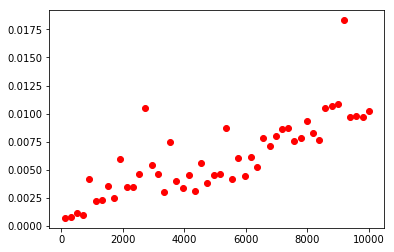

' linear time to insert and immediately delete the first element\n    Linked List is better\n'

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from timeit import timeit

def time_array_front_insert_delete(n):
    return timeit('lst.insert(0, None) ; del lst[0]',
                  'lst = list(range({}))'.format(n),
                  number=1000)

ns = np.linspace(100, 10000, 50)
plt.plot(ns, [time_array_front_insert_delete(int(n)) for n in ns], 'ro')
plt.show()
''' linear time to insert and immediately delete the first element
    Linked List is better
'''

In [ ]:
# consider:

def concatenate(arr1, arr2):
    """Concatenates the contents of arr1 and arr2 as efficiently (time-wise)
    as possible, so that the resulting structure can be used to index all
    combined elements (arr1's followed by arr2's)."""

    # option 1:
    for x in arr2:
        arr1.append(x)
    return arr19
    # O(n)

    # option 2:
    arr1.extend(arr2)
    return arr1
    # O(n)

    # option 3:
    return arr1 + arr2
    # O(n+m)
    '''
    Arrays use index base memory so the second array must be physically 
    next to it to access the second array.
    '''

## 2. Objectives

We need a new data storage mechanism for constructing data structures that:

- does not require monolithic, contiguous memory allocation,
- allows individual elements to be flexibly and efficiently reorganized,
- and preserves the ability to locate (e.g., via position) and iterate over elements

## 3. Mechanisms

### 3.1. Two-Element Lists

In [8]:
# data items
i1 = 'lions'
i2 = 'tigers'
i3 = 'bears'
i4 = 'oh, my'

In [9]:
[i1, i2, i3, i4]

['lions', 'tigers', 'bears', 'oh, my']

In [10]:
# creating individual "links"
link1 = [i1, None]
link2 = [i2, None]
link3 = [i3, None]
link4 = [i4, None]
#[data, reference]

In [11]:
print(link1[1])

None


In [13]:
# link-ing them together
link1[1] = link2
link2[1] = link3
link3[1] = link4
# reference = memory address

['lions', ['tigers', ['bears', ['oh, my', None]]]]


In [14]:
head = link1

In [15]:
head[0]

'lions'

In [16]:
head[1][0]

'tigers'

In [17]:
head[1][1][0]

'bears'

In [18]:
head[1][1][1][0]

'oh, my'

In [ ]:
# iteration

In [19]:
def list_iter(head):
    yield head[0]
    yield head[1][0]
    yield head[1][1][0]
    yield head[1][1][1][0]

In [20]:
for x in list_iter(head):
    print(x)

lions
tigers
bears
oh, my


In [21]:
def list_iter(head):
    node = head
    while node: # or node is not None
        yield node[0] # the value
        node = node[1] # next link
# None,0, (), and False are the same

In [26]:
for x in list_iter(head):
    print(x)

elephants
walruses
lions
tigers
bears
oh, my


In [23]:
# prepending
l0 = ['walruses', None]
l0[1] = head
head = l0

In [25]:
head = ['elephants', head]
'''
self.head = Link(val, self.head)
ArrayList implementation was O(n)
LinkedList implementation of adding a value is O(1)
'''

In [ ]:
# insertion
l0 = ['polar bears', head[1]] # reference after the first link
head[1] = l0 # value after the first link

### 3.2. "Link" objects

In [ ]:
class Link:
    def __init__(self, val, next=None):
        self.val = val
        self.next = next

In [ ]:
# manually constructing a list
l1 = Link(i1)
l2 = Link(i2)
l3 = Link(i3)
l4 = Link(i4)

In [ ]:
l1.next = l2
l2.next = l3
l3.next - l4

In [ ]:
head.next.next.next.val

In [ ]:
# iteration
def list_iter(head):
    node = head
    while node: # or node is not None
        yield node.val # the value
        node = node.next # next link

In [ ]:
for x in list_iiter(head):
    print(x)

In [ ]:
# iteration based on a recursive pattern

In [ ]:
class LinkedList:
    def __init__(self):
        self.head = None
        
    def prepend(self, val):
        self.head = Link(val, self.head)
        
    def __iter__(self):
        cursor = self.head
        while cursor:
            yield cursor.val
            cursor = cursor.next
            
    def __repr__(self):
        return '[' + ', '.join(str(x) for x in self) + ']'

In [ ]:
ll = LinkedList()

In [ ]:
for x in range(10): O(n)
    ll.preprend(x) # O(1) 
'''
O(n) vs ArrayList is O(n^2)
Picking a 2 link list is abitrary
It can be 3 
'''

In [ ]:
class BinaryLink:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [ ]:
# manual construction of a "tree"

In [ ]:
t = BinaryLink('hello',
              BinaryLink('hola',
                        BinaryLink('yo')), # left side
              BinaryLink('hello there', # right side
                        BinaryLink('sawasdee'),
                        BinaryLink('greetings')))

In [ ]:
def tree_iter(root):
    if root:
        yield root.val
        yield from tree_iter(root.left) # delegated generators
        yield from tree_iter(root.right)

In [ ]:
for x in tree_iter(t):
    print(x)

In [ ]:
class NaryLink:
    def __init__(self, val, n=2):
        self.val = val
        self.children = [None] * n
        
    def __getitem__(self, idx):
        return self.children[idx]
    
    def __setitem__(self, idx, val):
        self.children[idx] = val
        
    def __iter__(self):
        for c in self.children:
            yield c

In [ ]:
root = NaryLink('Kingdoms', n=5)

root[0] = NaryLink('Animalia', n=35)
root[1] = NaryLink('Plantae', n=12)
root[2] = NaryLink('Fungi', n=7)
root[3] = NaryLink('Protista', n=5)
root[4] = NaryLink('Monera', n=5)
# Fungi kingdom
root[2][0] = NaryLink('Chytridiomycota')
root[2][1] = NaryLink('Blastocladiomycota')
root[2][2] = NaryLink('Glomeromycota')
root[2][3] = NaryLink('Ascomycota')
root[2][4] = NaryLink('Basidiomycota')
root[2][5] = NaryLink('Microsporidia')
root[2][6] = NaryLink('Neocallimastigomycota')

def tree_iter(root):
    if root:
        yield root.val
        for c in root:
            yield from tree_iter(c)

In [ ]:
for x in tree_iter(root):
    print(x)
'''
Takeaway: Linked Structures are incredibly flexible.
Can create arbitrarily complex structures where data can be related 
to other data through the use of references.
'''